# Real Time Object Detection And Classification

## Object detection using YOLOv3 (You Only Look Once version 3) model, Tensorflow, Keras and OpenCV.

### Detection Model: YOLOv3
### Neural Network: Darknet53
### Training Dataset: COCO

REFERENCE (for original YOLOv3): 

[YOLOv3: An Incremental Improvement](https://pjreddie.com/media/files/papers/YOLOv3.pdf)

        @article{YOLOv3,  
              title={YOLOv3: An Incremental Improvement},  
              author={J Redmon, A Farhadi },
              year={2018} 
#### YOLO:   https://pjreddie.com/darknet/yolo/
#### Darknet:    https://pjreddie.com/darknet/

## Importing required modules

In [1]:

import os
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Importing the YOLO class from the yolo_model program
from model.yolo_model import YOLO

## Normalizing (Resizing) the image for easy recognition and classification

In [2]:
#Function to resize, reduce and expand image
def process_image(img):
    """
    Reading image as an array
        img: original image.

    # Returns
        image: ndarray(64, 64, 3), processed image.
    """
    image = cv2.resize(img, (416, 416),
                       interpolation=cv2.INTER_CUBIC)
    image = np.array(image, dtype='float32')
    image /= 255.
    image = np.expand_dims(image, axis=0)

    return image

## Read all the classes from the classes.txt file

In [3]:
# Function to get classes
# Person, Car, Bus, Dog etc...
def get_classes(file):
    """Get classes name.

    # Argument:
        file: classes name for database.

    # Returns
        class_names: List, classes name.

    """
    with open(file) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]

    return class_names

## Configuring the Bounding Boxes

In [4]:
#Function to draw boxes around the images
def draw(image, boxes, scores, classes, all_classes):
    """Draw the boxes on the image.

    # Argument:
        image: original image.
        boxes: ndarray, boxes of objects.
        classes: ndarray, classes of objects.
        scores: ndarray, scores of objects.
        all_classes: all classes name.
    """
    for box, score, cl in zip(boxes, scores, classes):
        x, y, w, h = box

        top = max(0, np.floor(x + 0.5).astype(int))
        left = max(0, np.floor(y + 0.5).astype(int))
        right = min(image.shape[1], np.floor(x + w + 0.5).astype(int))
        bottom = min(image.shape[0], np.floor(y + h + 0.5).astype(int))

        # Drawing the bounding box
        cv2.rectangle(image, (top, left), (right, bottom), (255, 0, 0), 2)

        # Choosing the text size, typeface and accuracy (score)
        cv2.putText(image, '{0} {1:.2f}'.format(all_classes[cl], score),
                    (top, left - 6),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    2.5, (0, 0, 255), 3,
                    cv2.LINE_AA)

        # Printing the bounding box with detected class and accuracy (score)
        print('class: {0}, score: {1:.2f}'.format(all_classes[cl], score))
        print('box coordinate x,y,w,h: {0}'.format(box))

    print()

## Detection in Images

In [5]:
def detect_image(image, yolo, all_classes):
    """Use yolo v3 to detect images.

    # Argument:
        image: original image.
        yolo: YOLO, yolo model.
        all_classes: all classes name.

    # Returns:
        image: processed image.
    """
    
    # Passing the image into the processing function
    pimage = process_image(image)

    # Capturing the timestamps and beginning classification
    start = time.time()
    boxes, classes, scores = yolo.predict(pimage, image.shape)
    end = time.time()

    # Print detected class and time taken to classify
    print('time: {0:.2f}s'.format(end - start))

    if boxes is not None:
        draw(image, boxes, scores, classes, all_classes)

    return image

In [6]:
## Detection in Videos and Webcam Feed 

In [7]:
def detect_video(video, yolo, all_classes):
    """Use yolo v3 to detect video.

    # Argument:
        video: video file.
        yolo: YOLO, yolo model.
        all_classes: all classes name.
    """
   
   # Path of testing videos folder
    video_path = os.path.join("videos", "test", video)

    '''
    Replace (0) with (video_path) to change
    input from webcam to video.
    '''
    
    # Capturing feed from the default webcam/test videos folder
    camera = cv2.VideoCapture(0)

    # Naming and adjusting the window size
    cv2.namedWindow("detection", cv2.WINDOW_NORMAL)

    # Prepare for saving the detected video
    sz = (int(camera.get(cv2.CAP_PROP_FRAME_WIDTH)),
        int(camera.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    fourcc = cv2.VideoWriter_fourcc(*'mpeg')

    # Writing the detected video into the results folder
    vout = cv2.VideoWriter()
    vout.open(os.path.join("videos", "res", video), fourcc, 20, sz, True)

    while True:
        res, frame = camera.read()

        if not res:
            break

        image = detect_image(frame, yolo, all_classes)
        cv2.imshow("detection", image)

        # Save the video frame by frame
        vout.write(image)

        if cv2.waitKey(110) & 0xff == ord('q'):
            break

    vout.release()
    camera.release()
    

## Setting the threshold values
## Reading the YOLO classes file

In [8]:
yolo = YOLO(0.7, 0.5)
"""
parameters: (object_threshold, bounding_threshold)

Lower object threshold may detect more objects but has a higher chance of misclassification.
"""

file = 'C:/Users/psvis/OneDrive/Documents/Object Detection Project/data/coco_classes.txt'
all_classes = get_classes(file)

# Detecting On Images

time: 1.34s
class: aeroplane, score: 0.99
box coordinate x,y,w,h: [  40.6212616   290.67455292 1503.01105499  527.48086452]



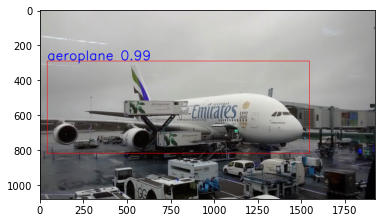

In [9]:
# Reading test image file
f = '/A380.jpg'
path = 'C:/Users/psvis/OneDrive/Documents/Object Detection Project/images/test'+f
image = cv2.imread(path)

# Function call to execute detection and save detected image
image = detect_image(image, yolo, all_classes)
cv2.imwrite('images/res/' + f, image)

# Display detected image
plt.imshow(image)
plt.show()

time: 0.45s
class: chair, score: 0.80
box coordinate x,y,w,h: [1285.58029175 1266.76427364  816.09409904  592.77396441]
class: chair, score: 0.73
box coordinate x,y,w,h: [  33.0910778  1333.53249407 1016.93748093 1667.41667461]
class: book, score: 0.80
box coordinate x,y,w,h: [2750.48818588 1685.21653461 1199.2500515   587.2389729 ]
class: laptop, score: 0.85
box coordinate x,y,w,h: [2104.84176636  820.45991993  979.18690395  896.25009584]



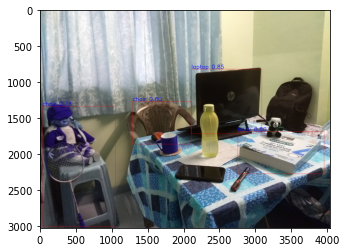

In [10]:
# Reading test image file
f = '/Project_Work2.jpg'
path = 'C:/Users/psvis/OneDrive/Documents/Object Detection Project/images/test'+f
image = cv2.imread(path)

# Function call to execute detection and save detected image
image = detect_image(image, yolo, all_classes)
cv2.imwrite('images/res/' + f, image)

# Display detected image
plt.imshow(image)
plt.show()

# Detecting on Video

In [11]:
# Enter video_filename   
video = 'honk_more_wait_more.mp4'

# Function call to execute detection 

"""
If the parameter passed in cv2.videoCapture() is 0, only the webcam feed is displayed.
"""

detect_video(video, yolo, all_classes)

time: 0.43s
class: person, score: 1.00
box coordinate x,y,w,h: [ 42.18235016  85.33957958 559.06272888 377.16153145]

time: 0.45s
class: person, score: 1.00
box coordinate x,y,w,h: [ 38.95246506  80.95034122 559.71694946 384.69426155]

time: 0.45s
class: person, score: 1.00
box coordinate x,y,w,h: [ 38.07264328  82.71662235 569.50946808 381.59731865]

time: 0.46s
class: person, score: 1.00
box coordinate x,y,w,h: [ 38.94046783  79.78727818 562.7191925  386.29300117]

time: 0.46s
class: person, score: 1.00
box coordinate x,y,w,h: [ 37.23190308  84.42967415 563.84231567 379.81721878]

time: 0.48s
class: person, score: 1.00
box coordinate x,y,w,h: [ 40.37086487  84.2393589  566.3067627  378.54600906]

time: 0.46s
class: person, score: 1.00
box coordinate x,y,w,h: [ 40.26258469  84.55285549 564.54280853 380.77769279]

time: 0.49s
class: person, score: 1.00
box coordinate x,y,w,h: [ 48.22185516  85.62848568 544.50828552 376.21762276]

time: 0.48s
class: person, score: 1.00
box coordinate x,